In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most forplot
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model

In [2]:
df = pd.read_csv("C:/Users/rsabharwal.admin/OneDrive - The University of Newcastle/Python Training/Datasets/data.csv") ### Cancer datase

In [3]:
df.head() # displaying first 5 rows of the dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
## checking if any null values exist in the data
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
# dimension
df.shape

(569, 33)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
#df = df.drop('id',inplace=True, axis=1) ### dropping ID variable
df = df.iloc[:,1:32]

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
#df.corr()['radius_mean'].sort_values(ascending=False)
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [11]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}) # converting text lables to numbers

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [14]:
#x = df[prediction_var]
x=df.iloc[:,1:]

In [15]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
y = df.diagnosis
y[:5]

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [17]:
5/100

0.05

In [18]:
# x = df.iloc[:,1:] # spilitting features
# #x = df[['perimeter_mean','compactness_mean']]
# y= df.diagnosis # Labels

In [19]:
#!pip install -U imbalanced-learn

In [20]:
#from imblearn.over_sampling import SMOTE

In [21]:
#smt = SMOTE()
#X_smote, y_smote = smt.fit_resample(x, y)

In [22]:
#print (x.shape)
    
#print (X_smote.shape)

In [23]:
#y_smote.value_counts()

In [24]:
df.shape

(569, 31)

In [25]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [26]:
357/569

0.6274165202108963

In [27]:
from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.20, random_state=5) # train test split

In [28]:
x_train.shape

(455, 30)

In [29]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


In [30]:
x_test.shape

(114, 30)

In [31]:
y_train.value_counts()

0    291
1    164
Name: diagnosis, dtype: int64

In [32]:
291/455

0.6395604395604395

In [33]:
#y= pd.DataFrame(y_train)

In [34]:
#y.head()

##### Fitting a Logistic Regression

In [35]:
logistic = LogisticRegression().fit(x_train,y_train)

C:\Users\rsabharwal.admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
logistic.intercept_

array([-0.1839617])

In [37]:
logistic.coef_

array([[-0.94476567, -0.43242346, -0.24759704,  0.01521871,  0.03331555,
         0.16070917,  0.22994943,  0.09939681,  0.04366178,  0.00792205,
        -0.04953133, -0.49975801, -0.14463717,  0.10800467,  0.0032279 ,
         0.03387371,  0.0501591 ,  0.01284834,  0.00938645,  0.00294247,
        -1.08916795,  0.46546124,  0.25832364,  0.01203714,  0.05872702,
         0.48355206,  0.62579489,  0.18440483,  0.14136272,  0.04624389]])

In [38]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [39]:
odds_ratio = np.exp(logistic.coef_)
odds_ratio

array([[0.38877066, 0.64893452, 0.78067446, 1.01533511, 1.03387673,
        1.17434339, 1.25853636, 1.10450449, 1.04462898, 1.00795351,
        0.95167534, 0.60667745, 0.8653362 , 1.11405295, 1.00323312,
        1.03445395, 1.05143836, 1.01293124, 1.00943064, 1.0029468 ,
        0.33649636, 1.59274866, 1.29475778, 1.01210988, 1.06048571,
        1.62182501, 1.8697316 , 1.20250253, 1.15184237, 1.04732981]])

In [40]:
np.exp(logistic.intercept_)

array([0.83196767])

In [41]:
pred = logistic.predict(x_test)

In [42]:
pred[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [43]:
pred_y = logistic.predict_proba(x_test)
#pred_y

In [44]:
y_test[:10]

28     1
163    0
123    0
361    0
549    0
339    1
286    0
354    0
421    0
124    0
Name: diagnosis, dtype: int64

In [45]:
from sklearn.metrics import confusion_matrix

In [46]:
pred_y_train = logistic.predict(x_train)

In [47]:
#logistic.score(x_train,y_train) ### Training data accuracy

In [48]:
confusion_matrix(y_test,pred)

array([[66,  0],
       [ 4, 44]], dtype=int64)

In [49]:
tn, fp, fn, tp= confusion_matrix(y_test,pred).ravel()

In [50]:
tp

44

In [51]:
tn

66

In [52]:
fp

0

In [53]:
fn

4

In [54]:
44/(44+0) #Precision

1.0

In [55]:
44/(44+4) #Recall

0.9166666666666666

In [56]:
(66+44)/(66+44+4+0) ##Accuracy

0.9649122807017544

In [57]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0      0.943     1.000     0.971        66
           1      1.000     0.917     0.957        48

    accuracy                          0.965       114
   macro avg      0.971     0.958     0.964       114
weighted avg      0.967     0.965     0.965       114



In [58]:
#pred_y

In [59]:
y_prob = pred_y[:,1]

In [60]:
#y_prob ## probability for class 1

In [61]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_prob)

In [62]:
fpr

array([0.        , 0.        , 0.        , 0.01515152, 0.01515152,
       0.03030303, 0.03030303, 0.06060606, 0.06060606, 0.12121212,
       0.12121212, 1.        ])

In [63]:
tpr

array([0.        , 0.10416667, 0.91666667, 0.91666667, 0.9375    ,
       0.9375    , 0.95833333, 0.95833333, 0.97916667, 0.97916667,
       1.        , 1.        ])

In [64]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 5.02613363e-01, 4.46220751e-01,
       4.02983705e-01, 3.67253591e-01, 3.33939650e-01, 1.95984823e-01,
       1.59233848e-01, 8.72834336e-02, 8.44283828e-02, 3.03040161e-04])

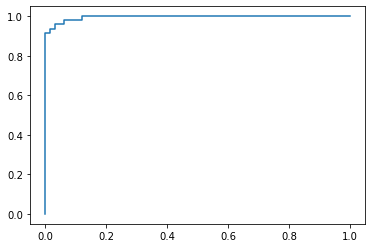

In [65]:
plt.plot(fpr,tpr)
plt.show()

In [66]:
tpr-fpr

array([0.        , 0.10416667, 0.91666667, 0.90151515, 0.92234848,
       0.90719697, 0.9280303 , 0.89772727, 0.91856061, 0.85795455,
       0.87878788, 0.        ])

In [67]:
optimal_idx = np.argmax(tpr-fpr)
optimal_idx

6

In [68]:
thresholds[optimal_idx]

0.3339396496836129

In [69]:
metrics.auc(fpr,tpr)

0.9952651515151515

In [70]:
#print(logistic.score(x_test,y_test, sample_weight=None))

In [71]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = metrics.roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

threshold = Find_Optimal_Cutoff(y_test,y_prob)

In [72]:
threshold

[0.3339396496836129]

### LDA
https://online.stat.psu.edu/stat504/node/149/

## Decision Tree Classifier

#####  maths behind decision tree
https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3#:~:text=Feature%20Importance-,Feature%20importance%20is%20calculated%20as%20the%20decrease%20in%20node%20impurity,the%20more%20important%20the%20feature.


##### Cost complexity Pruning

https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/#:~:text=Minimal%20Cost%2DComplexity%20Pruning%20is,known%20as%20the%20complexity%20parameter.&text=where%20%7CT%7C%20is%20the%20number,rate%20of%20the%20terminal%20nodes.

##### printing decision tree

https://mljar.com/blog/visualize-decision-tree/


In [73]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score

In [74]:
x = df.iloc[:,1:]
y = df.diagnosis

In [75]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [76]:
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.20, random_state=5) # train test split

In [77]:
x_train.shape

(455, 30)

In [78]:
y_test.shape

(114,)

In [79]:
clf = DecisionTreeClassifier(criterion='gini',random_state=5)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=5)

In [80]:
print(clf.score(x_test,y_test, sample_weight=None))

0.9473684210526315


In [81]:
print(clf.score(x_train,y_train, sample_weight=None))

1.0


In [82]:
pred = clf.predict(x_test)
pred

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

In [83]:
#clf.predict_proba(x_test)

In [84]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0      0.941     0.970     0.955        66
           1      0.957     0.917     0.936        48

    accuracy                          0.947       114
   macro avg      0.949     0.943     0.946       114
weighted avg      0.948     0.947     0.947       114



In [85]:
x_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [86]:
clf.feature_importances_

array([0.        , 0.        , 0.01906797, 0.        , 0.03410234,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00231287, 0.        , 0.        , 0.02303385, 0.        ,
       0.        , 0.        , 0.00855945, 0.00715049, 0.        ,
       0.        , 0.00949554, 0.01288845, 0.14283205, 0.02339374,
       0.        , 0.02600868, 0.69115456, 0.        , 0.        ])

In [87]:
# from sklearn import tree
# tree.plot_tree(clf.fit(x_train,y_train))

In [88]:
# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# from sklearn import tree

In [89]:
# dot_data = StringIO()
# tree.export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

In [90]:
#Image(graph.create_png())

In [91]:
#confusion_matrix(y_test, pred)

In [92]:
#clf.predict_proba(x_test)

In [93]:
features = df.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

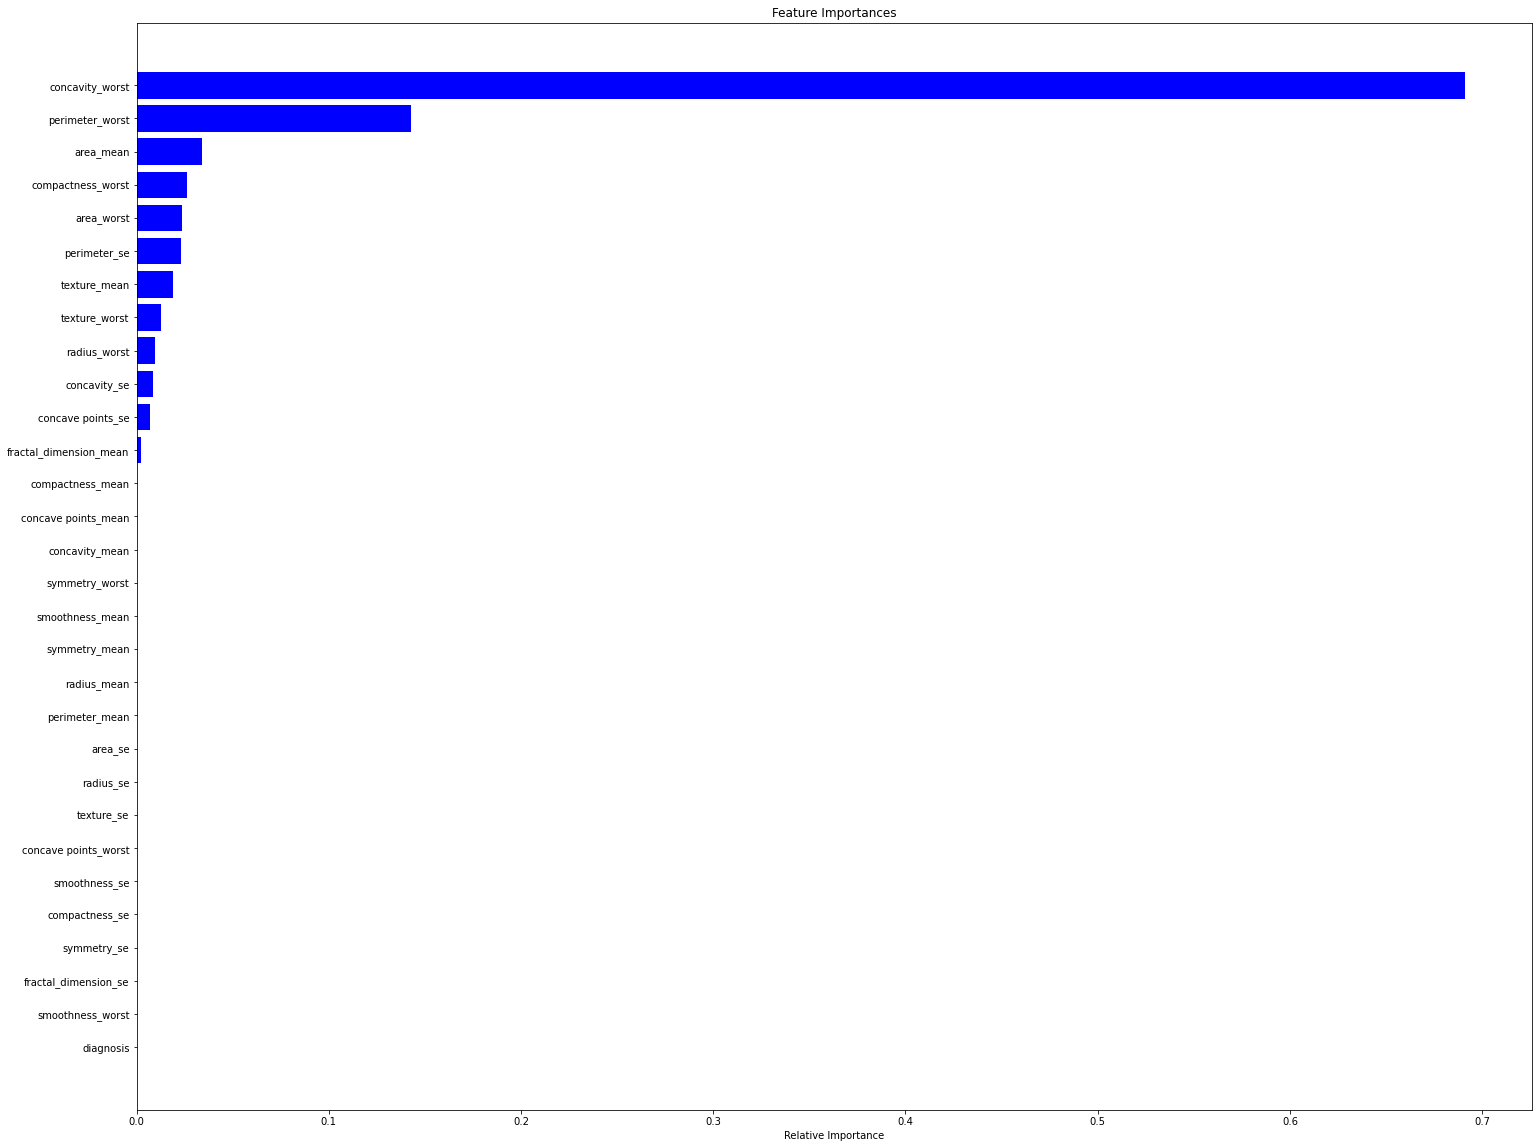

In [94]:
fig = plt.figure(figsize=(25,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [95]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_27 <= 0.14
|   |--- feature_23 <= 957.45
|   |   |--- feature_22 <= 101.95
|   |   |   |--- feature_13 <= 91.56
|   |   |   |   |--- feature_21 <= 33.35
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.35
|   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  91.56
|   |   |   |   |--- class: 1
|   |   |--- feature_22 >  101.95
|   |   |   |--- feature_24 <= 0.13
|   |   |   |   |--- feature_17 <= 0.02
|   |   |   |   |   |--- feature_13 <= 42.95
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_13 >  42.95
|   |   |   |   |   |   |--- feature_4 <= 0.10
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  0.10
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_17 >  0.02
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  0.13


In [96]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=df.columns,  
#                    class_names=df.diagnosis,
#                    filled=True)

## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


In [99]:
y_train[:5]

306    0
410    0
197    1
376    0
244    1
Name: diagnosis, dtype: int64

In [100]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=500,criterion="gini",oob_score=True,max_features='auto')# a simple random forest model
model.fit(x_train,y_train)# now fit our model for traiing data

RandomForestClassifier(n_estimators=500, oob_score=True)

In [101]:
pred= model.predict(x_test)

In [102]:
confusion_matrix(y_test,pred)

array([[65,  1],
       [ 3, 45]], dtype=int64)

In [103]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred, digits=3))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0      0.956     0.985     0.970        66
           1      0.978     0.938     0.957        48

    accuracy                          0.965       114
   macro avg      0.967     0.961     0.964       114
weighted avg      0.965     0.965     0.965       114



In [104]:
#print(metrics.accuracy_score(pred_rf,y_test)) # to check the accuracy

In [105]:
model.oob_score_ ### Accurcay of validation data

0.945054945054945

In [106]:
model.feature_importances_

array([0.04315748, 0.01471808, 0.04696197, 0.04526591, 0.00621439,
       0.01257286, 0.0551139 , 0.12099775, 0.00349627, 0.003632  ,
       0.01329375, 0.00454813, 0.01066009, 0.03331927, 0.00471228,
       0.00448091, 0.00742263, 0.00410662, 0.00416098, 0.00522917,
       0.10342779, 0.01789845, 0.12951607, 0.09402278, 0.01247454,
       0.01757972, 0.0445473 , 0.12045303, 0.00971611, 0.00629977])

In [107]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [108]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances)

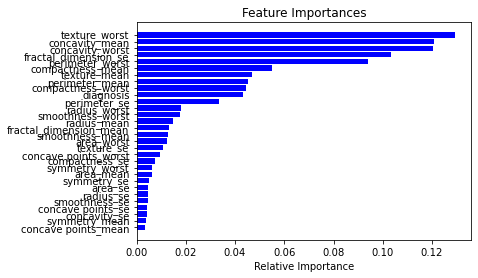

In [109]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Naive Bayes Implementation

In [110]:
from sklearn.naive_bayes import GaussianNB

In [111]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [112]:
y_train.value_counts()

0    291
1    164
Name: diagnosis, dtype: int64

In [113]:
291/(291+164)

0.6395604395604395

In [114]:
nb.class_prior_

array([0.63956044, 0.36043956])

In [115]:
pred_nb = nb.predict(x_test)

In [116]:
pred_nb

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1], dtype=int64)

In [117]:
pred_nb_prob = nb.predict_proba(x_test)
#pred_nb_prob[:,1]
pred_nb_prob

array([[1.21816818e-027, 1.00000000e+000],
       [1.00000000e+000, 2.48926402e-012],
       [9.99999955e-001, 4.50552396e-008],
       [1.00000000e+000, 1.88449085e-013],
       [1.00000000e+000, 2.90994228e-013],
       [9.14396074e-181, 1.00000000e+000],
       [1.00000000e+000, 2.28409707e-010],
       [1.00000000e+000, 1.14332165e-016],
       [8.63389378e-007, 9.99999137e-001],
       [1.00000000e+000, 1.47689574e-011],
       [1.00000000e+000, 8.23229098e-012],
       [9.99999982e-001, 1.76925665e-008],
       [1.58866225e-106, 1.00000000e+000],
       [1.00000000e+000, 5.68353549e-013],
       [1.00000000e+000, 5.00322848e-012],
       [1.00000000e+000, 8.95435632e-019],
       [3.76430998e-007, 9.99999624e-001],
       [1.00000000e+000, 1.76391451e-016],
       [1.00000000e+000, 6.83831402e-016],
       [1.00000000e+000, 2.94343270e-013],
       [8.86834744e-016, 1.00000000e+000],
       [1.00000000e+000, 1.21777690e-016],
       [1.00000000e+000, 1.64921398e-016],
       [1.0

In [118]:
from sklearn.metrics import mean_absolute_error,accuracy_score,classification_report,confusion_matrix 
print('Accuracy:', accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb, digits=3))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0      0.941     0.970     0.955        66
           1      0.957     0.917     0.936        48

    accuracy                          0.947       114
   macro avg      0.949     0.943     0.946       114
weighted avg      0.948     0.947     0.947       114



In [119]:
confusion_matrix(y_test, pred_nb)

array([[64,  2],
       [ 4, 44]], dtype=int64)

In [120]:
print(metrics.accuracy_score(pred_nb,y_test)) # to check the accuracy

0.9473684210526315


In [121]:
#nb.score(x_test,y_test)

### Implementing SVM

In [122]:
from sklearn.svm import SVC

In [123]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


In [182]:
model_svm = SVC(kernel='linear',C=1000)
model_svm.fit(x_train,y_train)

SVC(C=1000, kernel='linear')

In [183]:
pred_svm = model_svm.predict(x_test)

In [184]:
pred_svm

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

In [185]:
model_svm.coef_

array([[-1.04923885e+02, -4.33717093e+01,  2.27236252e+01,
         3.19627320e-01,  1.83627505e+02,  5.50538644e+01,
         2.77512744e+02,  2.31045373e+02,  2.26906264e+02,
        -2.06351856e+00, -4.25954708e+01, -5.82082242e+02,
         8.03060535e+00,  1.89019463e+01,  4.78297782e+01,
        -8.36649233e+01,  3.01649955e+01,  4.77292490e+01,
         1.68078580e+01, -2.12587688e+01,  1.50156286e+02,
         7.96354449e+01, -3.16976465e+01,  3.37702849e-01,
         3.38768825e+02,  1.35143633e+02,  7.39352053e+02,
         4.01967929e+02,  6.37341858e+02,  2.07452697e+01]])

In [186]:
print(metrics.accuracy_score(pred_svm,y_test)) # to check the accuracy

0.9649122807017544


In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1, 1],
                     'C': [0.1,1, 100,1000]}, {'kernel': ['linear'], 'C': [0.01,1, 100,1000]}]

In [176]:
tuned_parameters

[{'kernel': ['rbf'], 'gamma': [0.1, 1], 'C': [0.1, 1, 100, 1000]},
 {'kernel': ['linear'], 'C': [0.01, 1, 100, 1000]}]

In [177]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2)
clf.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 100, 1000], 'gamma': [0.1, 1],
                          'kernel': ['rbf']},
                         {'C': [0.01, 1, 100, 1000], 'kernel': ['linear']}])

In [178]:
clf.cv_results_

{'mean_fit_time': array([0.00857759, 0.01250577, 0.01645374, 0.00974524, 0.00649762,
        0.00949156, 0.00800145, 0.00799572, 0.00947022, 0.69244349,
        3.23466992, 3.18472147]),
 'std_fit_time': array([4.30583954e-04, 5.10215759e-04, 1.46555901e-03, 2.76434422e-03,
        5.16414642e-04, 2.50947475e-03, 1.02102757e-03, 1.98090076e-03,
        2.49743462e-03, 5.66401362e-01, 1.15305185e+00, 5.86947441e-01]),
 'mean_score_time': array([0.01544273, 0.01444173, 0.01720107, 0.01895177, 0.00997734,
        0.01193345, 0.01046455, 0.00997472, 0.00248218, 0.00249434,
        0.00796294, 0.00349259]),
 'std_score_time': array([4.81486320e-04, 1.51610374e-03, 1.76250935e-03, 4.98640537e-03,
        1.19209290e-06, 9.98616219e-04, 4.91499901e-04, 9.97304916e-04,
        5.11169434e-04, 4.99486923e-04, 4.00352478e-03, 4.95910645e-04]),
 'param_C': masked_array(data=[0.1, 0.1, 1, 1, 100, 100, 1000, 1000, 0.01, 1, 100,
                    1000],
              mask=[False, False, False, Fal

In [179]:
clf.best_score_

0.9472138496019785

In [180]:
clf.best_params_

{'C': 1000, 'kernel': 'linear'}

In [181]:
clf.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1], dtype=int64)

### RBF Kernel

https://www.youtube.com/watch?v=9NrALgHFwTo

## Poly Nomial Kernel

https://www.youtube.com/watch?v=3liCbRZPrZA